### 1. Загрузите файл HR.csv в pandas dataframe

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
hr = pd.read_csv('HR.csv')

In [18]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [19]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

Text(0.5, 1.0, 'Корреляция')

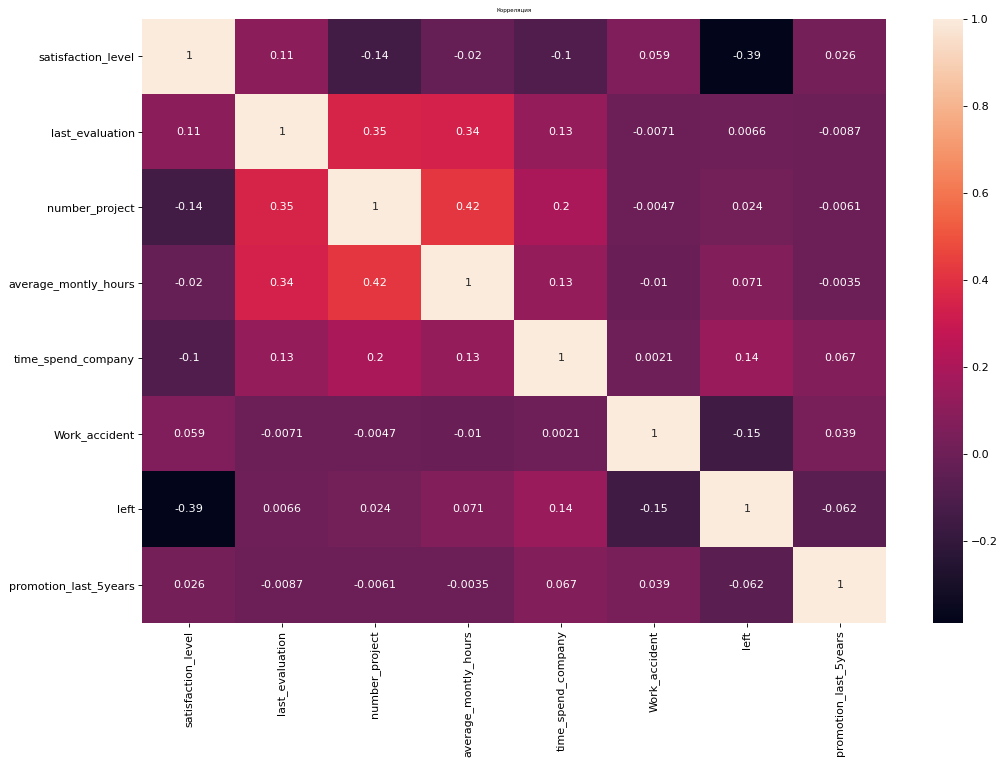

In [24]:
#Хитмап корреляции
plt.figure(figsize=(15, 10), dpi=80)
sns.heatmap(hr.corr(), annot=True)
plt.title('Корреляция', size=5)

### 4. Рассчитайте сколько сотрудников работает в каждомдепартаменте

In [21]:
hr.groupby(['department']).size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

### 5. Показать распределение сотрудников по зарплатам.

In [46]:
salary = hr.groupby(['salary']).size().reset_index().rename(columns={0: 'counts'})  ## распределение зарплаты
salary

,salary,counts
0,high,1237
1,low,7316
2,medium,6446


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

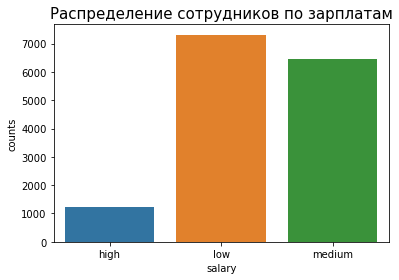

In [47]:
sns.barplot(x='salary', y='counts', data=salary)
plt.title('Распределение сотрудников по зарплатам', size=15)

### 6. Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [128]:
dept_salary = hr.groupby(['department', 'salary']).size().reset_index().rename(columns={0: 'counts'}).sort_values(
    by=['counts'], ascending=False)
dept_salary['salary'] = pd.Categorical(dept_salary['salary'], ['low', 'medium', 'high'])
dept_salary

,department,salary,counts
22,sales,low,2099
23,sales,medium,1772
28,technical,low,1372
29,technical,medium,1147
25,support,low,1146
26,support,medium,942
1,IT,low,609
2,IT,medium,535
19,product_mng,low,451
16,marketing,low,402


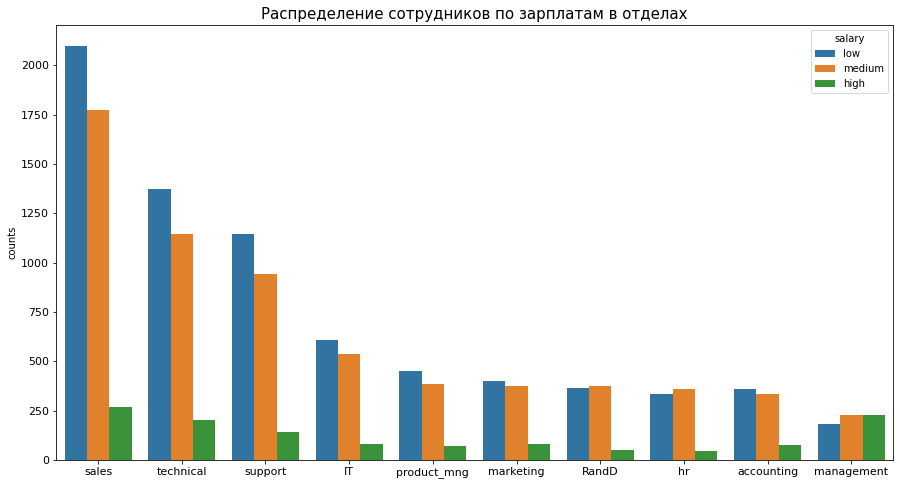

In [130]:
plt.figure(figsize=(15, 8))
sns.barplot(
    x='department',
    y='counts',
    hue="salary",
    data=dept_salary
).set(
    xlabel=None
)
plt.title('Распределение сотрудников по зарплатам в отделах', size=15)
plt.tick_params(labelsize=11)

### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [134]:
left_emp = hr[hr['left'] == 1]
emp = hr[hr['left'] == 0]

print(f"Доля уволившихся сотрудников, которых повысили за последние 5 лет: {left_emp['promotion_last_5years'].astype(int).mean():.2%}")
print(f"Доля неуволившихся сотрудников, которых повысили за последние 5 лет: {emp['promotion_last_5years'].astype(int).mean():.2%}")

Доля уволившихся сотрудников, которых повысили за последние 5 лет: 0.53%
Доля неуволившихся сотрудников, которых повысили за последние 5 лет: 2.63%


In [135]:
print(f"Средняя степень удовлетворенности уволившихся сотруников: {left_emp['satisfaction_level'].mean():.2%}")
print(f"Средняя степень удовлетворенности неуволившихся сотруников: {emp['satisfaction_level'].mean():.2%}")

Средняя степень удовлетворенности уволившихся сотруников: 44.01%
Средняя степень удовлетворенности неуволившихся сотруников: 66.68%


In [136]:
print(f"Среднее количество проектов уволившихся сотруников: {left_emp['number_project'].mean():.2f} проекта(в)")
print(f"Среднее количество проектов неуволившихся сотруников: {emp['number_project'].mean():.2f} проекта(в)")

Среднее количество проектов уволившихся сотруников: 3.86 проекта(в)
Среднее количество проектов неуволившихся сотруников: 3.79 проекта(в)
